In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load Tesla stock data
df = pd.read_csv('TSLA dataset.csv')

In [ ]:
print("Shape:", df.shape)

Shape: (3680, 7)


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30-06-2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01-07-2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02-07-2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06-07-2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3675,06-02-2025,373.029999,375.399994,363.179993,374.320007,374.320007,77918200
3676,07-02-2025,370.190002,380.549988,360.339996,361.619995,361.619995,70298300
3677,10-02-2025,356.209992,362.700012,350.510010,350.730011,350.730011,77514900
3678,11-02-2025,345.799988,349.369995,325.100006,328.500000,328.500000,118543400
3679,12-02-2025,329.940002,346.399994,329.119995,336.510010,336.510010,104520600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3680 non-null   object 
 1   Open       3680 non-null   float64
 2   High       3680 non-null   float64
 3   Low        3680 non-null   float64
 4   Close      3680 non-null   float64
 5   Adj Close  3680 non-null   float64
 6   Volume     3680 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 201.4+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3.680000e+03
mean,83.921033,85.765870,81.946501,83.893220,83.893192,9.652863e+07
std,110.692551,113.173098,107.967682,110.597280,110.597302,7.746858e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.777500e+06
25%,12.229167,12.436167,11.973833,12.188667,12.188667,4.918238e+07
50%,18.169334,18.418334,17.845333,18.220667,18.220667,8.195580e+07
75%,181.850002,185.182495,177.187500,181.092499,181.092499,1.217434e+08
max,475.899994,488.540008,457.510010,479.859985,479.859985,9.140820e+08


In [ ]:
# 4. Check column names
print("Columns:", df.columns.tolist())

Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
# 6. Check nulls
print("Null Values:\n", df.isnull().sum())

Null Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# 7. Unique values in 'Volume'
print("Unique Volume values:", df['Volume'].nunique())


Unique Volume values: 3649


In [ ]:
# Create Target: 1 if next day's close > today's close, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [ ]:
# Feature selection
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
print(X)


            Open        High         Low       Close     Volume
0       1.266667    1.666667    1.169333    1.592667  281494500
1       1.719333    2.028000    1.553333    1.588667  257806500
2       1.666667    1.728000    1.351333    1.464000  123282000
3       1.533333    1.540000    1.247333    1.280000   77097000
4       1.333333    1.333333    1.055333    1.074000  103003500
...          ...         ...         ...         ...        ...
3675  373.029999  375.399994  363.179993  374.320007   77918200
3676  370.190002  380.549988  360.339996  361.619995   70298300
3677  356.209992  362.700012  350.510010  350.730011   77514900
3678  345.799988  349.369995  325.100006  328.500000  118543400
3679  329.940002  346.399994  329.119995  336.510010  104520600

[3680 rows x 5 columns]


In [ ]:
y = df['Target']
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
3675    0
3676    0
3677    0
3678    1
3679    0
Name: Target, Length: 3680, dtype: int64


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
# Prediction
preds = model.predict(X_test)

In [ ]:
# Results
print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 0.49320652173913043


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       373
           1       0.49      1.00      0.66       363

    accuracy                           0.49       736
   macro avg       0.25      0.50      0.33       736
weighted avg       0.24      0.49      0.33       736



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


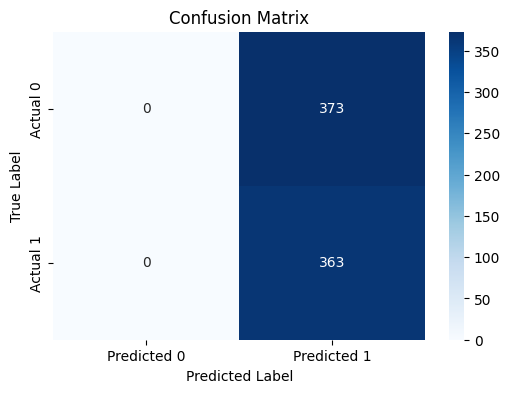

In [ ]:
# Optional: Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

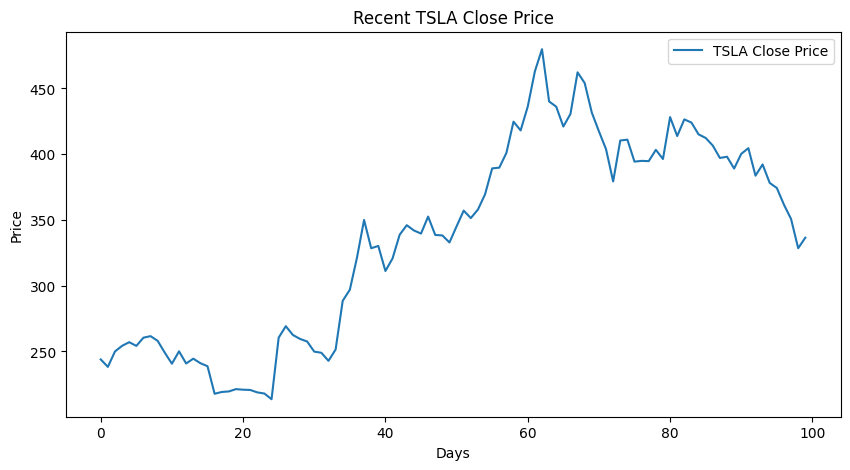

In [ ]:
# Optional: plot Close prices and prediction results
plt.figure(figsize=(10,5))
plt.plot(df['Close'].tail(100).values, label='TSLA Close Price')
plt.title("Recent TSLA Close Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

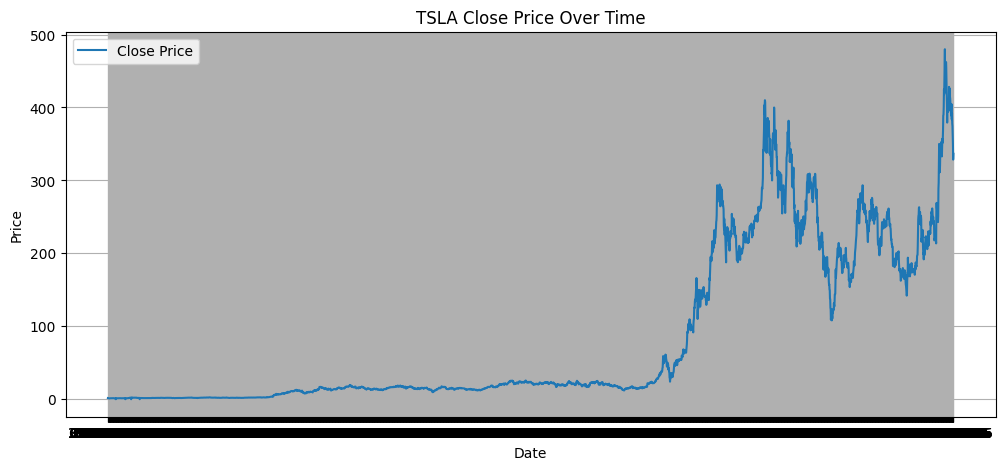

In [ ]:
# 1. Line Plot of Closing Prices
plt.figure(figsize=(12,5))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Close Price')
plt.title("TSLA Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

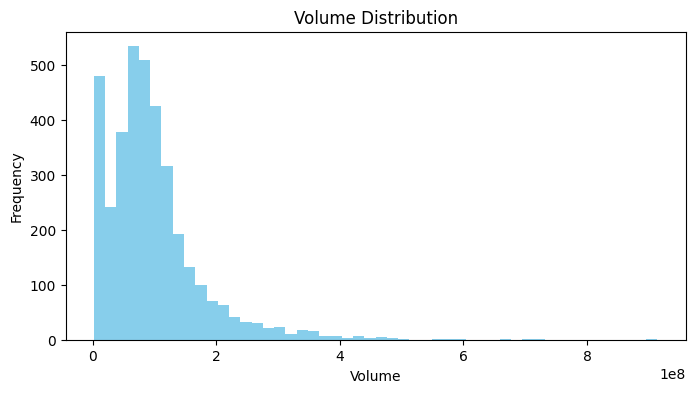

In [ ]:
# 2. Histogram of Volume
plt.figure(figsize=(8,4))
plt.hist(df_cleaned['Volume'], bins=50, color='skyblue')
plt.title("Volume Distribution")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

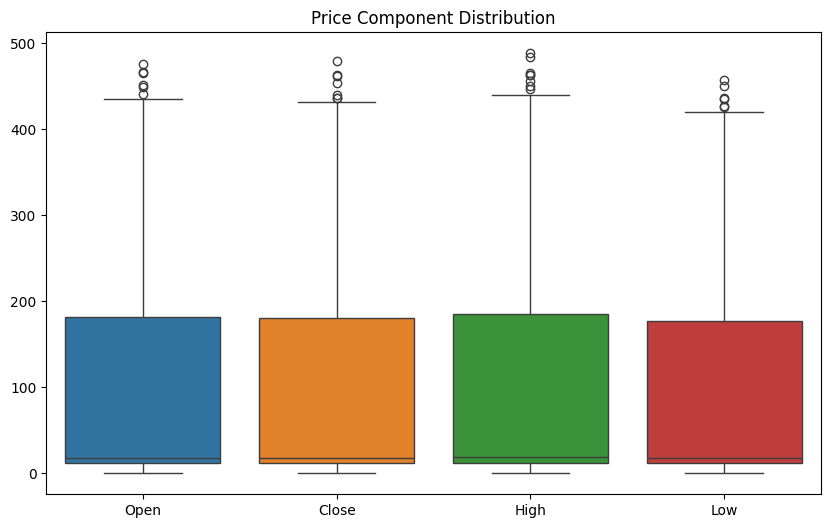

In [ ]:
# 3. Boxplot for Open, Close, High, Low
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned[['Open', 'Close', 'High', 'Low']])
plt.title("Price Component Distribution")
plt.show()

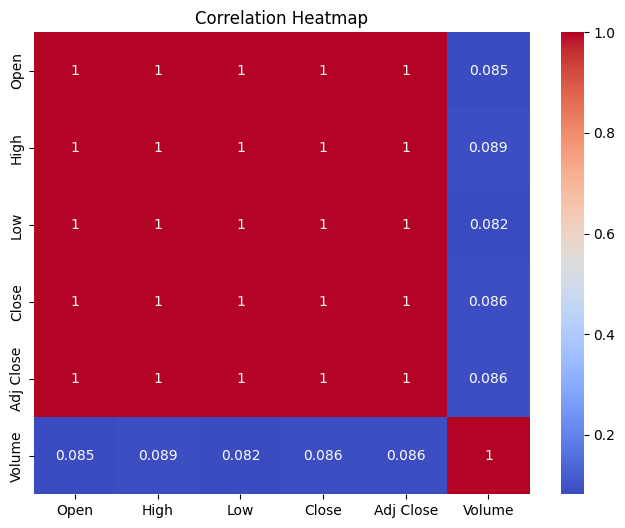

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-134-3756936291.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=y, palette='Set2')


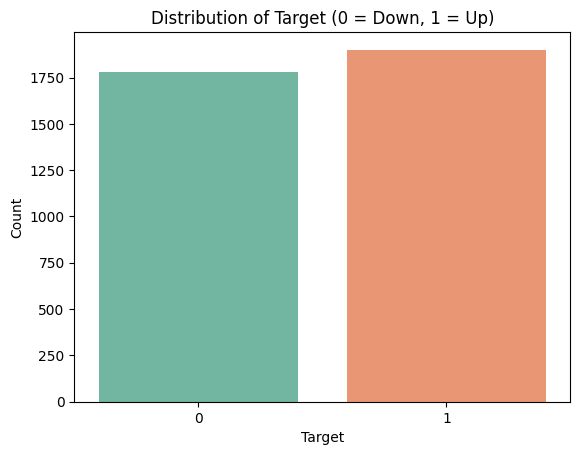

In [ ]:
sns.countplot(data=df_cleaned, x=y, palette='Set2')
plt.title("Distribution of Target (0 = Down, 1 = Up)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

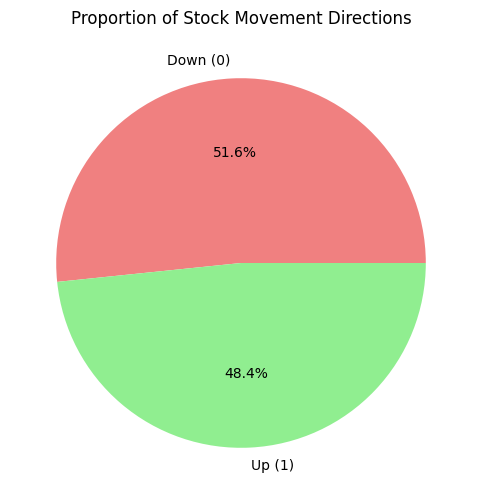

In [ ]:
target_counts = df['Target'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=['Down (0)', 'Up (1)'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title("Proportion of Stock Movement Directions")
plt.show()

/tmp/ipython-input-145-3059357624.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Close', data=df, palette='Set1')


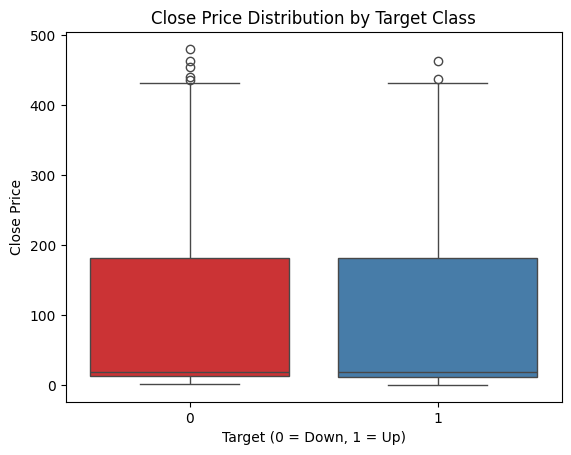

In [ ]:
sns.boxplot(x='Target', y='Close', data=df, palette='Set1')
plt.title("Close Price Distribution by Target Class")
plt.xlabel("Target (0 = Down, 1 = Up)")
plt.ylabel("Close Price")
plt.show()

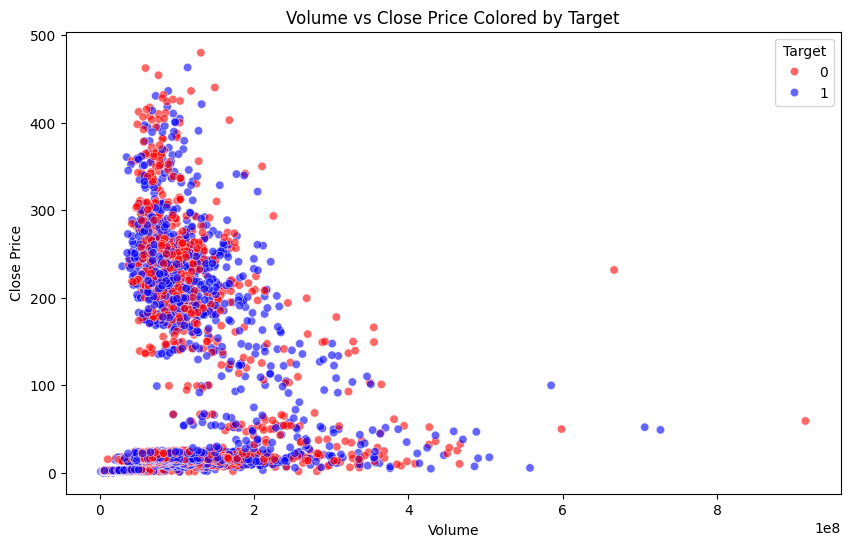

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Volume', y='Close', hue='Target', palette={0: 'red', 1: 'blue'}, alpha=0.6)
plt.title("Volume vs Close Price Colored by Target")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.legend(title="Target")
plt.show()